In [10]:
import numpy as np
import pandas as pd

abb=pd.read_csv("abb.csv")

In [234]:
subDB=abb[['TIMESTAMP','CLOSE','TOTTRDQTY']]
# subDB[-110:-102]

# dataDB[-110:-102]
# subDB['CLOSE'].tolist()

## Preparation of data
Here the stock data of perticular day is being prepared. What were the numbers before few days and what are the moving averate numbers and the total traded value etc. In next step, assign future day values for the y to be predicted. 
Before final use the data needs to be truncated to avoid nan values in MA200 etc and the future days also. Future days whatever the days you skipped needs to be kept outside before training and testing. You can get output for them once you fully satisfied.

In [263]:
dataDB=[]
# abb['MA200'] = abb['CLOSE'].rolling(window=200).mean()

def getMAs(subDB,masamplings,ColNameOn):
    for i in masamplings:
        colname='MA'+str(i)
        subDB[colname]=subDB[ColNameOn].rolling(window=i).mean()
    return subDB

# abb[190:205]
# def backDateExtraProps(subDB,nOfDays,ColNameOn):
# #     dataDB=subDB.copy()
# #     dataDB=dataDB.drop(dataDB.index[0:nOfDays])
#     dataDB=pd.DataFrame()
#     for i in range(0,nOfDays):
#         dataDB[ColNameOn+str(nOfDays-i)+'DaysBack']=subDB[ColNameOn][i:-(nOfDays-i)].tolist()
#     return dataDB
def prepareDataWithLast(subDB,masamplings,nOfDays,ColNamesOn):    
    subDB=getMAs(subDB,masamplings,ColNamesOn)
    dataDB=subDB.copy()
    dataDB=dataDB.drop(dataDB.index[0:nOfDays])
    for i in range(0,nOfDays):
        for cn in ColNamesOn:
            dataDB[cn+str(nOfDays-i)+'DaysBack']=subDB[cn][i:-(nOfDays-i)].tolist()        
    return dataDB
masamplings=[5,10,20,30,50,75,100]
nOfDays=5
ColNamesOn=["CLOSE","TOTTRDQTY"] # [primary , secondary]
myDataDB=prepareDataWithLast(subDB, masamplings,nOfDays,ColNamesOn)
# extraDataDB=backDateExtraProps(subDB,nOfDays,"TOTTRDQTY")
print(len(myDataDB),len(extraDataDB))


D:\adiarun\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


5760 5760


In [264]:
myDataDB.head(10)

,TIMESTAMP,CLOSE,TOTTRDQTY,MA5,MA10,MA20,MA30,MA50,MA75,MA100,CLOSE5DaysBack,TOTTRDQTY5DaysBack,CLOSE4DaysBack,TOTTRDQTY4DaysBack,CLOSE3DaysBack,TOTTRDQTY3DaysBack,CLOSE2DaysBack,TOTTRDQTY2DaysBack,CLOSE1DaysBack,TOTTRDQTY1DaysBack
5,1994-12-08,550.0,150,643.0,NaN,NaN,NaN,NaN,NaN,NaN,715.0,100,715.0,50,705.0,100,620.0,200,625.0,300
6,1994-12-12,560.0,50,612.0,NaN,NaN,NaN,NaN,NaN,NaN,715.0,50,705.0,100,620.0,200,625.0,300,550.0,150
7,1995-01-02,600.0,50,591.0,NaN,NaN,NaN,NaN,NaN,NaN,705.0,100,620.0,200,625.0,300,550.0,150,560.0,50
8,1995-01-05,590.0,200,585.0,NaN,NaN,NaN,NaN,NaN,NaN,620.0,200,625.0,300,550.0,150,560.0,50,600.0,50
9,1995-01-06,580.0,200,576.0,626.0,NaN,NaN,NaN,NaN,NaN,625.0,300,550.0,150,560.0,50,600.0,50,590.0,200
10,1995-01-10,600.0,150,586.0,614.5,NaN,NaN,NaN,NaN,NaN,550.0,150,560.0,50,600.0,50,590.0,200,580.0,200
11,1995-01-17,595.0,50,593.0,602.5,NaN,NaN,NaN,NaN,NaN,560.0,50,600.0,50,590.0,200,580.0,200,600.0,150
12,1995-01-18,600.0,100,593.0,592.0,NaN,NaN,NaN,NaN,NaN,600.0,50,590.0,200,580.0,200,600.0,150,595.0,50
13,1995-01-19,610.0,50,597.0,591.0,NaN,NaN,NaN,NaN,NaN,590.0,200,580.0,200,600.0,150,595.0,50,600.0,100
14,1995-01-20,605.0,100,602.0,589.0,NaN,NaN,NaN,NaN,NaN,580.0,200,600.0,150,595.0,50,600.0,100,610.0,50


In [266]:
# subDB

## Drop data from either ends
Need to drop the rows upto where MA200 starts having actual value. And Drop future days where you dont have the value. Put in X and y

In [267]:
# myDataDB
daysOfAdvPred=10
y_d = myDataDB[["TIMESTAMP","CLOSE"]][daysOfAdvPred:]
X_d=myDataDB.drop(myDataDB.index[-daysOfAdvPred:])
Req_d=myDataDB.drop(myDataDB.index[:-daysOfAdvPred])
if(nOfDays<masamplings[-1]):
    X=X_d.drop(X_d.index[0:masamplings[-1]-nOfDays-1])
    y=y_d.drop(y_d.index[0:masamplings[-1]-nOfDays-1])
else:
    X=X_d
    y=y_d
X=X.drop('TIMESTAMP',axis=1)
y=y.drop('TIMESTAMP',axis=1)
R=Req_d.drop('TIMESTAMP',axis=1)

In [268]:
print(len(y),len(X_d))
# X
# X_d.index[0:masamplings[-1]-nOfDays-1]
# masamplings[-1]-nOfDays-1
# X_d[X_d.columns[6:15]]
# X

5656 5750


In [269]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [270]:
len(X)
# X_d

5656

In [271]:
from sklearn.linear_model import LinearRegression

regressor = LinearRegression()
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [272]:
print('Weight coefficients: ', regressor.coef_)
print('y-axis intercept: ', regressor.intercept_)


Weight coefficients:  [[ 8.58623264e-01 -5.75016707e-06  1.35417394e-01  3.57205793e-01
  -3.49554500e-01  1.97909735e-01 -3.55781574e-01  3.51923892e-01
  -6.37172737e-02  2.63696165e-02 -8.38256351e-06 -7.18975288e-02
   1.81339253e-06 -4.37449897e-02  1.69509515e-06 -3.23112156e-02
  -5.98813112e-06 -3.35825575e-02 -1.64034791e-07]]
y-axis intercept:  [24.70187841]


In [125]:
%matplotlib inline
import matplotlib.pyplot as plt
# min_pt = X.min() * regressor.coef_[0] + regressor.intercept_
# max_pt = X.max() * regressor.coef_[0] + regressor.intercept_

# plt.plot([X.min(), X.max()], [min_pt, max_pt])
# plt.plot(X_train, y_train, 'o');

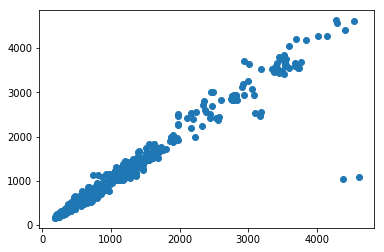

In [273]:
# y_pred_train = regressor.predict(X_train)
# plt.plot(X_train, y_train, 'o', label="data")
# plt.plot(X_train, y_pred_train, 'o', label="prediction")
# plt.plot([X.min(), X.max()], [min_pt, max_pt], label='fit')
# plt.legend(loc='best')
y_pred_test = regressor.predict(X_test)
yR_pred = regressor.predict(R)
# plt.plot(y_pred_test, y_test, 'o', label="data")

In [323]:
# yR_pred.toarray()
yR = [x for sublist in yR_pred for x in sublist]


In [327]:
tstamp=datetime.strptime(subDB['TIMESTAMP'].iloc[-1],'%Y-%m-%d')
# ordinal_time=tstamp.toordinal()+
d = []
for i in np.array(range(0,len(yR)))+tstamp.toordinal()+1:
    d.append( datetime.fromordinal(i))
d

yPred=pd.DataFrame(index={"TIMESTAMP":d,"CLOSE":yR})
# yPred


,CLOSE,TIMESTAMP
0,1499.805664,2018-03-14
1,1501.583187,2018-03-15
2,1497.165811,2018-03-16
3,1468.723948,2018-03-17
4,1457.426617,2018-03-18
5,1422.646255,2018-03-19
6,1413.519667,2018-03-20
7,1423.850575,2018-03-21
8,1419.951848,2018-03-22
9,1397.482150,2018-03-23


In [284]:
from datetime import datetime
datetime.now()

datetime.datetime(2018, 3, 14, 15, 19, 59, 930292)

In [341]:
yR

[1499.8056639794781,
 1501.583186770174,
 1497.1658108967204,
 1468.7239481336724,
 1457.4266167644591,
 1422.6462551171685,
 1413.519666521579,
 1423.850575388375,
 1419.951848300113,
 1397.4821497388339]

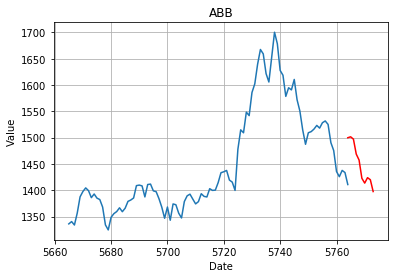

In [346]:
# print(y_pred_test)
# print(y_test)
past_vals2plot=100
indx=np.array(range(0,len(yR)))+y_d.index[-1]
plt.plot(y_d.CLOSE[-past_vals2plot:])
plt.plot(indx,yPred.CLOSE.tolist(),'r')


plt.xlabel('Date')
plt.ylabel('Value')
plt.title('ABB')
# plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# plt.axis([40, 160, 0, 0.03])
plt.grid(True)
plt.show()

In [343]:

indx

array([5764, 5765, 5766, 5767, 5768, 5769, 5770, 5771, 5772, 5773])

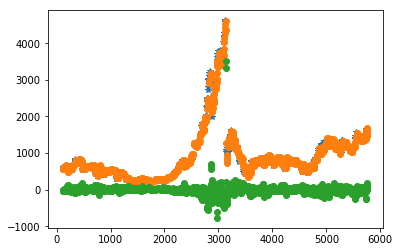

In [276]:
regressor.score(X_test, y_test)

# plt.hist()
plt.plot(y_test.index,y_test,'*')
plt.plot(y_test.index,y_pred_test,'o')
plt.plot(y_test.index,y_pred_test-y_test,'o')
# Fixing random state for reproducibility

# yy=100*(y_test-y_pred_test)/y_test
# x = yy['CLOSE'].tolist()

# # the histogram of the data
# n, bins, patches = plt.hist(x, 50, density=True, facecolor='g', alpha=0.75)


# plt.xlabel('Smarts')
# plt.ylabel('Probability')
# plt.title('Histogram of IQ')
# # plt.text(60, .025, r'$\mu=100,\ \sigma=15$')
# # plt.axis([40, 160, 0, 0.03])
# plt.grid(True)
# plt.show()

In [277]:
# npx=np.array(x)
# squares=npx*npx
# squares
# # sum(npx*npx)
# plt.hist(squares)
yypow=yy*yy
sum(yypow['CLOSE'])- max(yypow['CLOSE'])

1141264.6214593097